<h1 style="text-align:center;">IDFC FAME 2.0 ROUND 2 CODES</h1>


<h2 style="text-align:center;">Exploratory Data Analysis</h2>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:

df = pd.read_csv('Validation Data file.csv', index_col='Customer_No')
df1 = df.copy()
col = df.columns

In [3]:
df.head()

,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
Customer_No,,,,,,,,,,,,,,,,,,,,
90000,2,22623,57,100.0,8,NaN,0.0,NaN,Yes,0.142857,0.285714,1990,2.0,0.5,33,NaN,NaN,0,8795.0,13
90001,1,61114,100,100.0,6,NaN,NaN,NaN,Yes,0.000000,0.250000,1971,14.0,0.5,52,NaN,NaN,0,13039.0,1
90002,2,12573,100,100.0,4,NaN,NaN,NaN,Yes,0.500000,0.500000,1999,8.0,1.0,24,0.0,2.0,2,24599.0,-4
90003,0,18210,100,NaN,7,NaN,NaN,NaN,No,0.000000,0.000000,1994,0.0,NaN,29,NaN,NaN,3,48750.0,9
90004,2,41174,100,100.0,1,NaN,NaN,NaN,Yes,0.333333,0.333333,1999,19.0,0.5,24,NaN,NaN,0,55384.0,4


Function for Missing values in each column

In [4]:
def missingdata_percentage(df, per=0):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            count = df[col].isna().sum()
            percentage = 100*df[col].isna().sum()/df.shape[0]
            if percentage>=per:
              missing = missing.append({'category' : col, 'percentage' : percentage, 'count' : int(count)}, ignore_index=True)
    missing.sort_values(by=['percentage'], inplace=True, ascending=False)
    return missing

In [5]:
train_data_Miss = missingdata_percentage(df)
train_data_Miss

,category,percentage,count
3,CoAp_Income,95.060045,28576.0
1,Max_Ratio_OC_Pending_POS,89.551246,26920.0
6,Total_Field_Trails,67.619174,20327.0
7,Total_Resolved,62.117029,18673.0
5,Perc_Paymode_Cheq_Fail,28.638435,8609.0
0,Max_Perc_Def_Chg_Pending,24.513489,7369.0
2,N_PosBkt_L3m,6.157480,1851.0
4,Max_DPD_L3m,0.392535,118.0
8,Max_Loan_Balance_Others,0.372576,112.0


### Let's start filling missing values in descending order.

### Handling "CoAp_Income"
* Upon closer inspection "CoAp_Income"(income of co-applicant) column looks like a optional entry and hence so many missing values. 95% of them are missing values so they won't add any value to the data hence we can drop this column.




### Handling "Max_Ratio_OC_Pending_POS"

In [9]:
count = df['Max_Ratio_OC_Pending_POS'].value_counts()[0]
count

48

* Next "Max_Ratio_OC_Pending_POS" column also have 90% of missing values, most of these values are between 0 and 1.<br>
 -->Although there are 249 0's in dataset so they might correspond to people who paid their overdue charges.<br>--> And remaining null values most likely means these people didn't had any overdue charges to begin with. <br>
 -->So its a good idea to assume these values to be zero.<br>
-->But let's analyze further.

From above data we see that 27% of people who have overdue charges have defaulted, that means other 73% of people are not defaulters.<br>
Also 0 doesn't necessarily confirms that person will not commit default. <br>
Thus we know that we cannot replace null value with 0, instead we can change them to another categorical variable and work on that. 

#### Now lets examine null values of "Total_field_trials" and "Total_resolved"

In [ ]:
'''def find_col_relation_with_target(df, col, value = 0):
    Valuecount_col_is_value = df['Target_Flag'][df[col] == value].value_counts()
    Valuecount_col_is_null = df['Target_Flag'][df[col].isna()].value_counts()
    null_without_default_last_12_month = df[col].isna()[df['Ever_Default_L12M'] == 'No'].sum()
    null_with_default_last_12_month = df[col].isna()[df['Ever_Default_L12M'] == 'Yes'].sum()
    null_without_default_last_3_month = df[col].isna()[df['N_Default_L3m'] == 'No'].sum()
    null_with_default_last_3_month = df[col].isna()[df['N_Default_L3m'] == 'Yes'].sum()
    print("vALUE COUNTS OF TARGET FLAGS WHEN COLUMN HAS VALUES:", Valuecount_col_is_value)
    print("vALUE COUNTS OF TARGET FLAGS WHEN COLUMN HAS NULL VALUES:", Valuecount_col_is_null)
    print("NULL VALUES DISTRIBUTION WITHOUT DEFAULT IN LAST ", null_without_default_last_12_month)
    print("vALUE COUNTS OF TARGET FLAGS WHEN COLUMN HAS VALUES:", null_with_default_last_12_month)
    print("vALUE COUNTS OF TARGET FLAGS WHEN COLUMN HAS VALUES:", null_without_default_last_3_month)
    print("vALUE COUNTS OF TARGET FLAGS WHEN COLUMN HAS VALUES:", null_with_default_last_3_month)'''

'def find_col_relation_with_target(df, col, value = 0):\n    Valuecount_col_is_value = df[\'Target_Flag\'][df[col] == value].value_counts()\n    Valuecount_col_is_null = df[\'Target_Flag\'][df[col].isna()].value_counts()\n    null_without_default_last_12_month = df[col].isna()[df[\'Ever_Default_L12M\'] == \'No\'].sum()\n    null_with_default_last_12_month = df[col].isna()[df[\'Ever_Default_L12M\'] == \'Yes\'].sum()\n    null_without_default_last_3_month = df[col].isna()[df[\'N_Default_L3m\'] == \'No\'].sum()\n    null_with_default_last_3_month = df[col].isna()[df[\'N_Default_L3m\'] == \'Yes\'].sum()\n    print("vALUE COUNTS OF TARGET FLAGS WHEN COLUMN HAS VALUES:", Valuecount_col_is_value)\n    print("vALUE COUNTS OF TARGET FLAGS WHEN COLUMN HAS NULL VALUES:", Valuecount_col_is_null)\n    print("NULL VALUES DISTRIBUTION WITHOUT DEFAULT IN LAST ", null_without_default_last_12_month)\n    print("vALUE COUNTS OF TARGET FLAGS WHEN COLUMN HAS VALUES:", null_with_default_last_12_month)\n    

In [11]:
col = df.columns
col

Index(['N_Default_L3m', 'Branch_Code', 'Max_Utilization',
       'Max_Perc_Def_Chg_Pending', 'N_Family_Member',
       'Max_Ratio_OC_Pending_POS', 'N_PosBkt_L3m', 'CoAp_Income',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'Total_Field_Trails', 'Total_Resolved', 'N_Enq_L9m',
       'Max_Loan_Balance_Others', 'N_WorkEx_Yr'],
      dtype='object')

In [ ]:
# Distribution of null values:
df['Total_Field_Trails'].value_counts(), df['Total_Resolved'].value_counts()

(0.0    18186
 1.0     5993
 2.0     1725
 3.0      567
 4.0       49
 5.0       13
 6.0        6
 9.0        1
 7.0        1
 Name: Total_Field_Trails, dtype: int64,
 1.0    15255
 2.0     7032
 3.0     4881
 0.0     3780
 Name: Total_Resolved, dtype: int64)

In [12]:
# Checking occurences of null values in both the fields simultaneously:
checking_common_occurences = df[(df['Total_Field_Trails'].isna() ) & (df['Total_Resolved'].isna())].shape[0]
checking_common_occurences

18673

* Now since there a lot of null values we can solve them using some common sense.
* First if there are lots of null amount of "Total_Field_Trails" it strongly indicates 0 field visits.
* Also above code shows that all the null values in "Total_Resolved" is when "Total_Field_Trails" is null as well.
* But in "Total_Resolved" column it doesn't tells us if Customer was visited or not.
* So we can take all the null value from total_resolved column as another value, let's say "not_visited".

In [13]:
correlation = df['Total_Field_Trails'].corr(df['Total_Resolved'])
correlation

0.15295449564574604

### Now lets look at the 'Perc_Paymode_Cheq_Fail' column.

<Axes: >

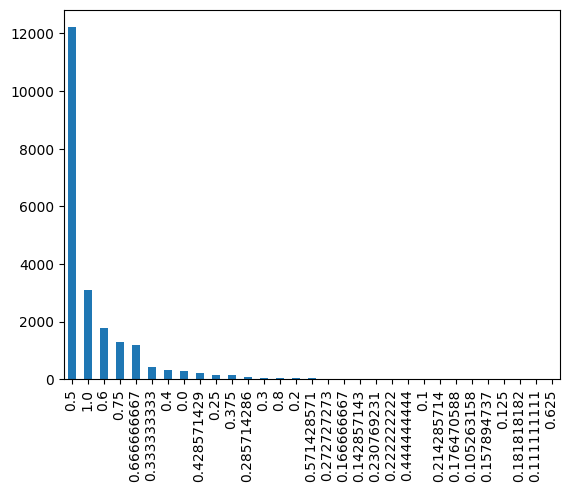

In [14]:
def_chg_perc = df['Perc_Paymode_Cheq_Fail'].value_counts()[df['Perc_Paymode_Cheq_Fail'].value_counts() >= 0]
def_chg_perc.plot(kind='bar')

In [15]:
df['Perc_Paymode_Cheq_Fail'].value_counts()[0.0]

282

* We see that some of the values are 0 thus it means that customer with null values have never attempted to pay via cheque.

Although there is ambiguity its safe to assume 0 inplace of null values.

---

Now lets find some relation between Payment methods and payment failures.

Now lets explore "Max_Perc_Def_Chg_Pending" column:
1. Firstly this column signifies the maximum percentage of default charges pending.

Number of null values:

In [16]:
null_perc_def_chg = df['Max_Perc_Def_Chg_Pending'].isna().sum()
null_perc_def_chg

7369

Null values may mean that person never had any default charge. So lets check amount of customer with default in past 12 months and Max_Perc_Def_Chg_Pending as null.


In [17]:
null_without_default = df['Max_Perc_Def_Chg_Pending'].isna()[df['Ever_Default_L12M'] == 'No'].sum()
null_with_default = df['Max_Perc_Def_Chg_Pending'].isna()[df['Ever_Default_L12M'] == 'Yes'].sum()
null_with_default/null_perc_def_chg, null_without_default/null_perc_def_chg

(0.18279278056724116, 0.8172072194327589)

We can see that customer without default in last 12 months have 80% of the null values and rest does have default.
It is safe to assume that null values means customer never had any default in last 12 months.<br>
----> So we can take null values to be another category.

<Axes: >

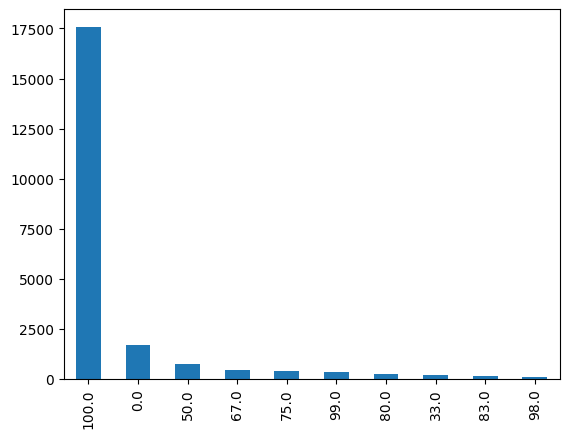

In [18]:
def_chg_perc = df['Max_Perc_Def_Chg_Pending'].value_counts()[df['Max_Perc_Def_Chg_Pending'].value_counts() >= 100]
def_chg_perc.plot(kind='bar')

Now lets handle "N_Default_L3m" column missing values: 

In [19]:
df['N_PosBkt_L3m'].isna().sum()

1851

In [20]:
df['N_PosBkt_L3m'].value_counts()

0.0    27798
1.0      385
2.0       27
Name: N_PosBkt_L3m, dtype: int64

We see that for missing values defaults are 680 and not defaults are 4658. Which is a proportionate distribution with whole training data.
* It may also correspond to people who recently took the loan. (Less than 3 months ago)<br>
 Anyway since it merely affects 6% of the data so we can test it out with imputing 0, if needed we can try some other methods.
---

Now remaining two columns with missing values are:
1. Max_DPD_L3m
2. Max_Loan_Balance_Others

In [23]:
df['Max_DPD_L3m'].isna().sum()

118

We see that about 7.5% of customer defaulted when their days delay in payment was 0.
Also about 14.12% of people defaulted otherwise.

One interesting way to solve this problem would be imputing 0.0 in case target flag is 0 and  15.0 or higher when target flag is 1.

<Axes: >

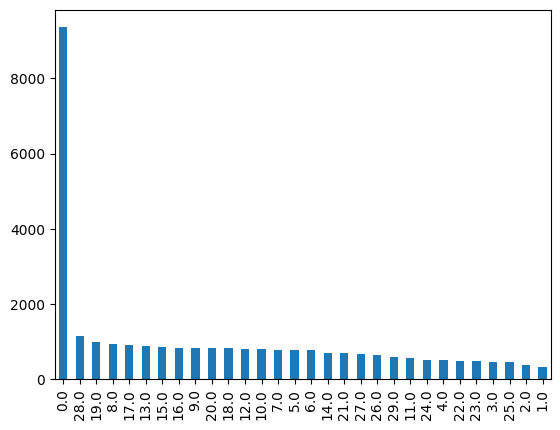

In [25]:
df['Max_DPD_L3m'].value_counts().plot(kind='bar')

Now for column "Max_Loan_Balance_Others":

In [26]:
df['Max_Loan_Balance_Others'].isna().sum()

112

In [27]:
df['Max_Loan_Balance_Others'].describe()

count    2.994900e+04
mean     1.534301e+05
std      5.596070e+05
min     -2.300000e+01
25%      9.417000e+03
50%      2.001200e+04
75%      1.155250e+05
max      6.504087e+07
Name: Max_Loan_Balance_Others, dtype: float64

We see there are some negative values in this column lets make them positive.

In [28]:
df['Max_Loan_Balance_Others'] = df['Max_Loan_Balance_Others'].abs()

In [29]:
df['Max_Loan_Balance_Others'].describe()

count    2.994900e+04
mean     1.534301e+05
std      5.596070e+05
min      0.000000e+00
25%      9.417000e+03
50%      2.001200e+04
75%      1.155250e+05
max      6.504087e+07
Name: Max_Loan_Balance_Others, dtype: float64

Let's compare different percentile with Target_Flag

12%, 12.5%, 12.42%, 10.9%
12.32, 

1. There are zeroes in this column which suggest that column includes people with zero loan. <br>
2. There are very less null values it may quite simply mean that these customer doesn't even have a bank account in other banks.
3. Distribution of target flag over different range of percentile is more or less similar.
4. Moreover distribution of target flag is also quite similar in case when loan balance with others is 0.

 -----> In any case filling these null values with 0 will do no harm.

In [31]:
col

Index(['N_Default_L3m', 'Branch_Code', 'Max_Utilization',
       'Max_Perc_Def_Chg_Pending', 'N_Family_Member',
       'Max_Ratio_OC_Pending_POS', 'N_PosBkt_L3m', 'CoAp_Income',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'Total_Field_Trails', 'Total_Resolved', 'N_Enq_L9m',
       'Max_Loan_Balance_Others', 'N_WorkEx_Yr'],
      dtype='object')

In [32]:
filtered_df = df[(df['Max_Ratio_OC_Pending_POS'] >= 0) & (df['Max_Ratio_OC_Pending_POS'] <= 1)]


<Axes: >

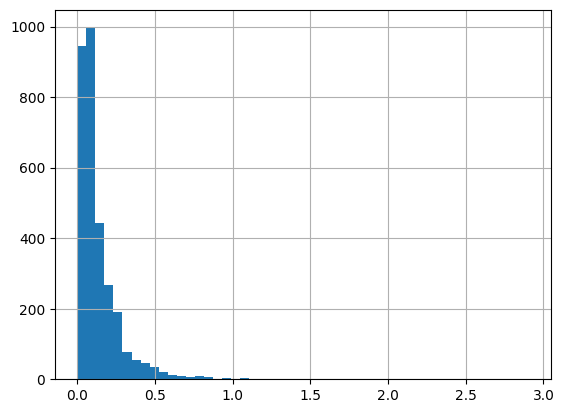

In [33]:
df['Max_Ratio_OC_Pending_POS'].hist(bins=50)

In [34]:
count = df['Max_Ratio_OC_Pending_POS'].value_counts()
count

0.000000    48
0.211540     9
0.220130     9
0.068765     8
0.102632     7
            ..
0.077571     1
0.129966     1
0.449014     1
0.093419     1
0.032175     1
Name: Max_Ratio_OC_Pending_POS, Length: 2674, dtype: int64

---

Identifying Numerical Datatypes Columns

In [35]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  19


,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
Customer_No,,,,,,,,,,,,,,,,,,,
90000,2,22623,57,100.0,8,NaN,0.0,NaN,0.142857,0.285714,1990,2.0,0.5,33,NaN,NaN,0,8795.0,13
90001,1,61114,100,100.0,6,NaN,NaN,NaN,0.000000,0.250000,1971,14.0,0.5,52,NaN,NaN,0,13039.0,1
90002,2,12573,100,100.0,4,NaN,NaN,NaN,0.500000,0.500000,1999,8.0,1.0,24,0.0,2.0,2,24599.0,-4
90003,0,18210,100,NaN,7,NaN,NaN,NaN,0.000000,0.000000,1994,0.0,NaN,29,NaN,NaN,3,48750.0,9
90004,2,41174,100,100.0,1,NaN,NaN,NaN,0.333333,0.333333,1999,19.0,0.5,24,NaN,NaN,0,55384.0,4


Finding Rest of the Columns

In [36]:
for col in df.columns:
    if col not in numerical_features:
        print(col)

Ever_Default_L12M


In [37]:
df['Ever_Default_L12M'].unique()

array(['Yes', 'No'], dtype=object)

Changing "Yes" and "No" to 0 and 1 respectively

In [38]:
df['Ever_Default_L12M'] = df['Ever_Default_L12M'].replace({'Yes': 1, 'No': 0})

In [40]:
df.isna().sum()

N_Default_L3m                   0
Branch_Code                     0
Max_Utilization                 0
Max_Perc_Def_Chg_Pending     7369
N_Family_Member                 0
Max_Ratio_OC_Pending_POS    26920
N_PosBkt_L3m                 1851
CoAp_Income                 28576
Ever_Default_L12M               0
Perc_Paymode_Online             0
Perc_Repay_Fail                 0
Birth_Year                      0
Max_DPD_L3m                   118
Perc_Paymode_Cheq_Fail       8609
Age                             0
Total_Field_Trails          20327
Total_Resolved              18673
N_Enq_L9m                       0
Max_Loan_Balance_Others       112
N_WorkEx_Yr                     0
dtype: int64

In [41]:
df['Total_Resolved'].value_counts()

1.0    6011
2.0    2916
3.0    1392
0.0    1069
Name: Total_Resolved, dtype: int64

In [42]:
df['Total_Resolved'].fillna('None', inplace= True)


In [43]:
df['Total_Field_Trails'].value_counts()

0.0    6984
1.0    2043
2.0     565
3.0     122
4.0      15
5.0       4
6.0       1
Name: Total_Field_Trails, dtype: int64

In [44]:
df['Total_Field_Trails'].fillna(0, inplace= True)

In [45]:
df['Max_Ratio_OC_Pending_POS'].fillna('Others', inplace=True)

In [46]:
df['Max_Loan_Balance_Others'].fillna(0, inplace= True)

In [47]:
df['Perc_Paymode_Cheq_Fail'].fillna(0, inplace= True)

In [48]:
df.isna().sum()

N_Default_L3m                   0
Branch_Code                     0
Max_Utilization                 0
Max_Perc_Def_Chg_Pending     7369
N_Family_Member                 0
Max_Ratio_OC_Pending_POS        0
N_PosBkt_L3m                 1851
CoAp_Income                 28576
Ever_Default_L12M               0
Perc_Paymode_Online             0
Perc_Repay_Fail                 0
Birth_Year                      0
Max_DPD_L3m                   118
Perc_Paymode_Cheq_Fail          0
Age                             0
Total_Field_Trails              0
Total_Resolved                  0
N_Enq_L9m                       0
Max_Loan_Balance_Others         0
N_WorkEx_Yr                     0
dtype: int64

In [49]:
df['Max_Perc_Def_Chg_Pending'].fillna('None', inplace= True)

In [50]:
df['N_PosBkt_L3m'].fillna(0, inplace= True)

Now dropping some columns which are not needed


In [51]:
len(df['Branch_Code'].unique())

24034

huge no of branches so no point in exploring them.

In [52]:
df.drop(columns=['CoAp_Income', 'Branch_Code'], inplace=True)

In [53]:
df.sample(10)

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
Customer_No,,,,,,,,,,,,,,,,,,
110030,3,51,98.0,0,Others,0.0,1,0.333333,0.333333,1989,4.0,0.600000,34,0.0,None,1,20424.0,10
100470,1,51,100.0,0,Others,0.0,1,0.250000,0.250000,1996,17.0,1.000000,27,1.0,1.0,2,6994.0,7
94985,2,52,99.0,5,Others,0.0,1,0.333333,0.333333,1989,21.0,0.666667,34,0.0,1.0,1,70020.0,14
102759,2,76,97.0,-4,0.062328,1.0,1,0.285714,0.285714,1992,24.0,0.500000,31,0.0,1.0,0,8399.0,11
116176,0,51,None,2,Others,0.0,0,0.000000,0.000000,1981,0.0,0.000000,42,0.0,None,0,23000.0,15
112578,3,64,100.0,0,Others,0.0,1,0.500000,0.500000,1994,24.0,1.000000,29,0.0,None,0,6394.0,9
111633,0,64,100.0,6,Others,0.0,1,0.000000,0.000000,1998,0.0,0.000000,25,0.0,None,0,10293.0,5
98533,2,88,100.0,6,Others,0.0,1,0.142857,0.285714,1975,9.0,0.500000,48,0.0,1.0,0,10582.0,28
112535,3,52,100.0,1,0.129863,0.0,1,0.111111,0.333333,2000,27.0,0.500000,23,0.0,1.0,0,65640.0,3


In [54]:
df['Max_Perc_Def_Chg_Pending'].value_counts()

100.0    17584
None      7369
0.0       1673
50.0       760
67.0       420
         ...  
3.0          1
18.0         1
27.0         1
16.0         1
8.0          1
Name: Max_Perc_Def_Chg_Pending, Length: 92, dtype: int64

we see that some values are negative so lets make them positive.

In [55]:
df['N_Family_Member'] = df['N_Family_Member'].abs()

In [56]:
df['N_WorkEx_Yr'] = df['N_WorkEx_Yr'].abs()

In [57]:
df['Max_Loan_Balance_Others'] = df['Max_Loan_Balance_Others'].abs()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 90000 to 120060
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             30061 non-null  int64  
 1   Max_Utilization           30061 non-null  int64  
 2   Max_Perc_Def_Chg_Pending  30061 non-null  object 
 3   N_Family_Member           30061 non-null  int64  
 4   Max_Ratio_OC_Pending_POS  30061 non-null  object 
 5   N_PosBkt_L3m              30061 non-null  float64
 6   Ever_Default_L12M         30061 non-null  int64  
 7   Perc_Paymode_Online       30061 non-null  float64
 8   Perc_Repay_Fail           30061 non-null  float64
 9   Birth_Year                30061 non-null  int64  
 10  Max_DPD_L3m               29943 non-null  float64
 11  Perc_Paymode_Cheq_Fail    30061 non-null  float64
 12  Age                       30061 non-null  int64  
 13  Total_Field_Trails        30061 non-null  float64
 14  T

In [59]:
df['Max_Perc_Def_Chg_Pending']

Customer_No
90000     100.0
90001     100.0
90002     100.0
90003      None
90004     100.0
          ...  
120056     83.0
120057     None
120058    100.0
120059     None
120060    100.0
Name: Max_Perc_Def_Chg_Pending, Length: 30061, dtype: object

In [60]:
categorical_cols = ['N_Default_L3m','N_Family_Member', 'N_PosBkt_L3m', 'Ever_Default_L12M','Total_Field_Trails', 'Total_Resolved']

Identifying outliers:


ABOVE DATA IS MISLEADING REMOVE THESE

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 90000 to 120060
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             30061 non-null  int64  
 1   Max_Utilization           30061 non-null  int64  
 2   Max_Perc_Def_Chg_Pending  30061 non-null  object 
 3   N_Family_Member           30061 non-null  int64  
 4   Max_Ratio_OC_Pending_POS  30061 non-null  object 
 5   N_PosBkt_L3m              30061 non-null  float64
 6   Ever_Default_L12M         30061 non-null  int64  
 7   Perc_Paymode_Online       30061 non-null  float64
 8   Perc_Repay_Fail           30061 non-null  float64
 9   Birth_Year                30061 non-null  int64  
 10  Max_DPD_L3m               29943 non-null  float64
 11  Perc_Paymode_Cheq_Fail    30061 non-null  float64
 12  Age                       30061 non-null  int64  
 13  Total_Field_Trails        30061 non-null  float64
 14  T

In [63]:
df.isna().sum()

N_Default_L3m                 0
Max_Utilization               0
Max_Perc_Def_Chg_Pending      0
N_Family_Member               0
Max_Ratio_OC_Pending_POS      0
N_PosBkt_L3m                  0
Ever_Default_L12M             0
Perc_Paymode_Online           0
Perc_Repay_Fail               0
Birth_Year                    0
Max_DPD_L3m                 118
Perc_Paymode_Cheq_Fail        0
Age                           0
Total_Field_Trails            0
Total_Resolved                0
N_Enq_L9m                     0
Max_Loan_Balance_Others       0
N_WorkEx_Yr                   0
dtype: int64

In [65]:
df['Max_DPD_L3m'].fillna(df['Max_DPD_L3m'].mode(), inplace=True)

In [62]:
df['Max_Ratio_OC_Pending_POS'].unique()

array(['Others', 0.048208457, 0.064682817, ..., 0.060206968, 0.094231012,
       0.032175266], dtype=object)

In [66]:
df['Max_Perc_Def_Chg_Pending'].replace({'None': 0}, inplace=True)

In [67]:
df['Max_Ratio_OC_Pending_POS'].replace({'Others': 0}, inplace=True)

In [68]:
df['Total_Resolved'].unique()
           

array(['None', 2.0, 1.0, 3.0, 0.0], dtype=object)

In [69]:
df['Total_Resolved'].replace({'None': 0}, inplace=True)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 90000 to 120060
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             30061 non-null  int64  
 1   Max_Utilization           30061 non-null  int64  
 2   Max_Perc_Def_Chg_Pending  30061 non-null  float64
 3   N_Family_Member           30061 non-null  int64  
 4   Max_Ratio_OC_Pending_POS  30061 non-null  float64
 5   N_PosBkt_L3m              30061 non-null  float64
 6   Ever_Default_L12M         30061 non-null  int64  
 7   Perc_Paymode_Online       30061 non-null  float64
 8   Perc_Repay_Fail           30061 non-null  float64
 9   Birth_Year                30061 non-null  int64  
 10  Max_DPD_L3m               29943 non-null  float64
 11  Perc_Paymode_Cheq_Fail    30061 non-null  float64
 12  Age                       30061 non-null  int64  
 13  Total_Field_Trails        30061 non-null  float64
 14  T

In [71]:
df['Max_Ratio_OC_Pending_POS'].unique()

array([0.        , 0.04820846, 0.06468282, ..., 0.06020697, 0.09423101,
       0.03217527])

One Hot Encoding

In [72]:
for col in categorical_cols:
    df[col] = df[col].astype('object')
    print(df[col].unique())


[2 1 0 3]
[8 6 4 7 1 2 5 3 10 0 9 11]
[0.0 1.0 2.0]
[1 0]
[0.0 2.0 1.0 3.0 4.0 5.0 6.0]
[0.0 2.0 1.0 3.0]


In [73]:
for col in categorical_cols:
    if df[col].dtype == 'object':
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [74]:
df.head()

,Max_Utilization,Max_Perc_Def_Chg_Pending,Max_Ratio_OC_Pending_POS,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,...,Ever_Default_L12M_1,Total_Field_Trails_1.0,Total_Field_Trails_2.0,Total_Field_Trails_3.0,Total_Field_Trails_4.0,Total_Field_Trails_5.0,Total_Field_Trails_6.0,Total_Resolved_1.0,Total_Resolved_2.0,Total_Resolved_3.0
Customer_No,,,,,,,,,,,,,,,,,,,,,
90000,57,100.0,0.0,0.142857,0.285714,1990,2.0,0.5,33,0,...,1,0,0,0,0,0,0,0,0,0
90001,100,100.0,0.0,0.000000,0.250000,1971,14.0,0.5,52,0,...,1,0,0,0,0,0,0,0,0,0
90002,100,100.0,0.0,0.500000,0.500000,1999,8.0,1.0,24,2,...,1,0,0,0,0,0,0,0,1,0
90003,100,0.0,0.0,0.000000,0.000000,1994,0.0,0.0,29,3,...,0,0,0,0,0,0,0,0,0,0
90004,100,100.0,0.0,0.333333,0.333333,1999,19.0,0.5,24,0,...,1,0,0,0,0,0,0,0,0,0


In [75]:
df.head()

,Max_Utilization,Max_Perc_Def_Chg_Pending,Max_Ratio_OC_Pending_POS,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,...,Ever_Default_L12M_1,Total_Field_Trails_1.0,Total_Field_Trails_2.0,Total_Field_Trails_3.0,Total_Field_Trails_4.0,Total_Field_Trails_5.0,Total_Field_Trails_6.0,Total_Resolved_1.0,Total_Resolved_2.0,Total_Resolved_3.0
Customer_No,,,,,,,,,,,,,,,,,,,,,
90000,57,100.0,0.0,0.142857,0.285714,1990,2.0,0.5,33,0,...,1,0,0,0,0,0,0,0,0,0
90001,100,100.0,0.0,0.000000,0.250000,1971,14.0,0.5,52,0,...,1,0,0,0,0,0,0,0,0,0
90002,100,100.0,0.0,0.500000,0.500000,1999,8.0,1.0,24,2,...,1,0,0,0,0,0,0,0,1,0
90003,100,0.0,0.0,0.000000,0.000000,1994,0.0,0.0,29,3,...,0,0,0,0,0,0,0,0,0,0
90004,100,100.0,0.0,0.333333,0.333333,1999,19.0,0.5,24,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv('Preprocessed_validation.csv', index=False)